<a href="https://colab.research.google.com/github/Hohensonne/colab/blob/main/%D0%A1%D0%98%D0%98_%D0%90%D0%9B%D0%98%D0%9C%D0%9E%D0%92_%D0%94%D0%90_%D0%A2%D0%A1%D0%9E_405%D0%91_21_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Системы искусственного интеллекта
### СФ МАИ

### Лабораторная работа №3

Регрессия и классификация

Студент: *Алимов Даниил Алексеевич*

Группа: *ТСО-405Б-21*

### Для сдачи задания прикрепите файл в формате .ipynb в LMS!

Имя файла должно соответствовать определенному шаблону - СИИ_Фамилия_ИО_группа_Задание№3.

_Пример: СИИ_Иванов_ИИ_ТСО-405Б-21_Задание№3.ipynb_

**Если доступ к lms затруднен - сообщите лично, в противном случае это не является поводом к продлению сроков сдачи!**

Сроки указаны в lms.

## №1. Предсказание зарплаты

Датасет для выполнения задания: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Основная задача: обучить регрессию на данных, предсказать зарплату в долларах для соискателя с Entry-level опытом, Full-time, из США, на полностью удаленной работе для США, Великобритании, Канады.

По возможности выберите несколько регрессоров и сравните их результаты. Пример в файле example_оформление

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('ds_salaries.csv')

In [ ]:
data.isna().mean()

,0
Unnamed: 0,0.0
work_year,0.0
experience_level,0.0
employment_type,0.0
job_title,0.0
salary,0.0
salary_currency,0.0
salary_in_usd,0.0
employee_residence,0.0
remote_ratio,0.0


In [ ]:
def show_rows(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [ ]:
show_rows(data)

Уникальные значения столбца Unnamed: 0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

In [ ]:
data.drop(["job_title", "salary", "company_size", "work_year"], axis= 1, inplace= True )

filtered_data = data[
    (data['salary_currency'] == 'USD') &
    (data['employment_type'] == 'FT') &
    (data['employee_residence'] == 'US') &
    (data['experience_level'] == 'EN') &
    (data['remote_ratio'] == 100) &
    (data['company_location'].isin(['US', 'GB', 'CA']))
]


<Axes: >

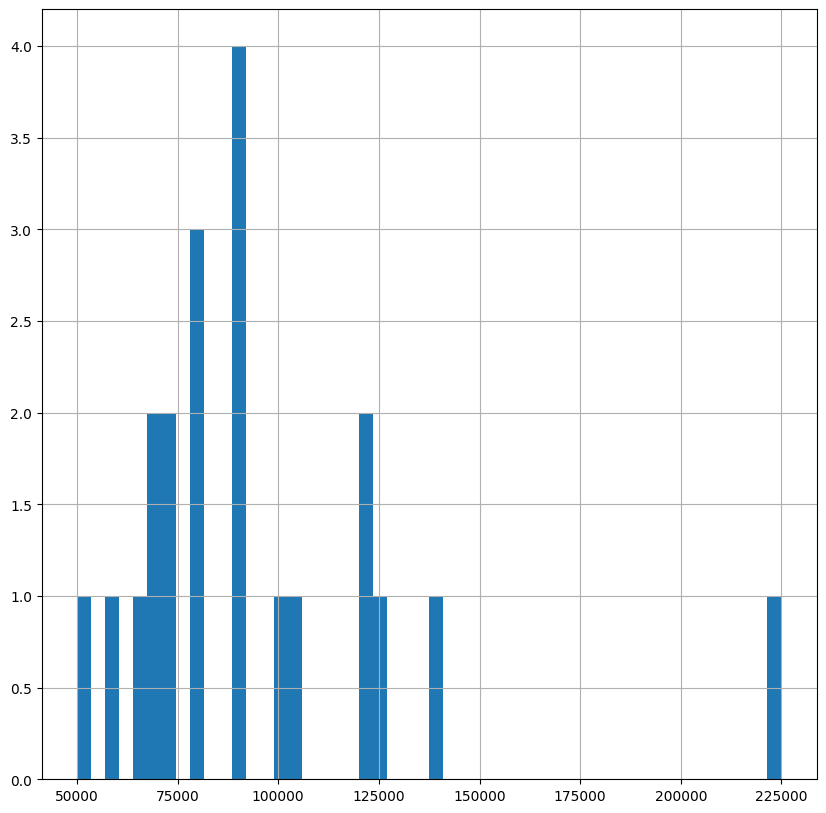

In [ ]:
filtered_data['salary_in_usd'].hist(bins=50, figsize=(10,10))

<Axes: >

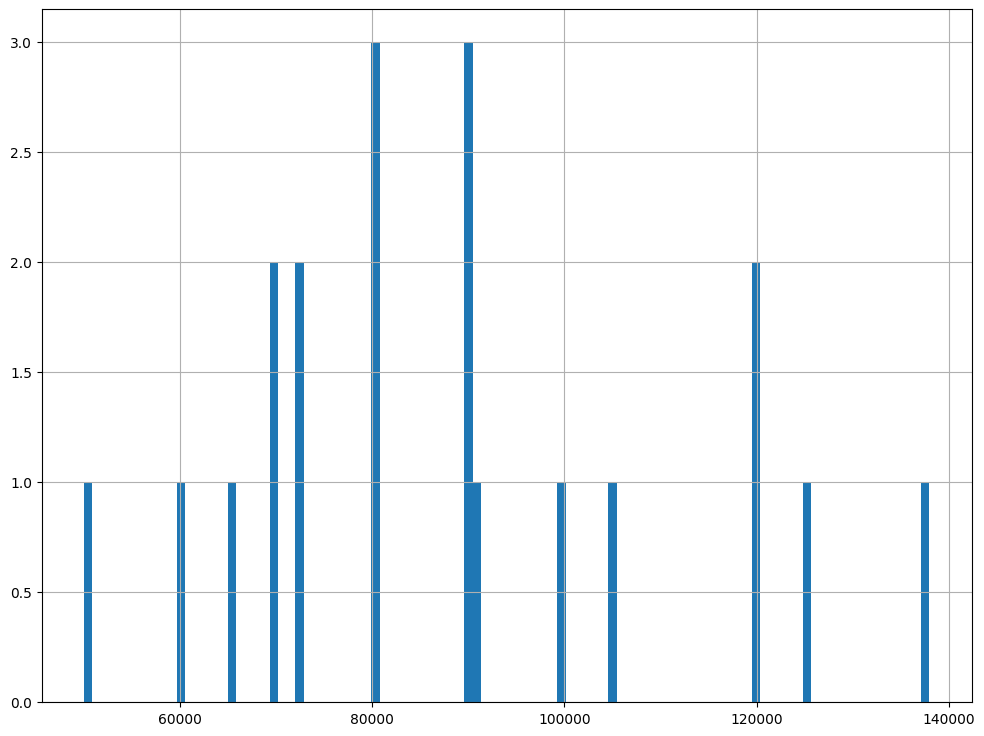

In [ ]:
filtered_data = filtered_data.query('salary_in_usd < 150000')
filtered_data['salary_in_usd'].hist(bins=100, figsize=(12,9))

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 5 to 512
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          20 non-null     int64 
 1   experience_level    20 non-null     object
 2   employment_type     20 non-null     object
 3   salary_currency     20 non-null     object
 4   salary_in_usd       20 non-null     int64 
 5   employee_residence  20 non-null     object
 6   remote_ratio        20 non-null     int64 
 7   company_location    20 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.4+ KB


In [ ]:
show_rows(filtered_data)

Уникальные значения столбца Unnamed: 0
[  5  31  39  51  68  79  98 118 122 139 159 166 172 199 251 270 275 465
 508 512]
Уникальные значения столбца experience_level
['EN']
Уникальные значения столбца employment_type
['FT']
Уникальные значения столбца salary_currency
['USD']
Уникальные значения столбца salary_in_usd
[ 72000  70000 138000  91000 105000  80000  90000  50000 125000  60000
  72500 100000 120000  65000]
Уникальные значения столбца employee_residence
['US']
Уникальные значения столбца remote_ratio
[100]
Уникальные значения столбца company_location
['US']


In [ ]:
out = ~data["Unnamed: 0"].isin(filtered_data["Unnamed: 0"])
data = data[out];


In [ ]:
data = data.reset_index(drop=True)
filtered_data = filtered_data.reset_index(drop=True)

In [ ]:
#Неизмененные принаки
original_features = data.drop('salary_in_usd', axis=1)

#Прямое кодирование
encoder = OrdinalEncoder()
cat_columns = ['experience_level', 	'employment_type', 'employee_residence', 'remote_ratio', 	'company_location']
cat_features = original_features[cat_columns]
cat_features = pd.DataFrame(encoder.fit_transform(cat_features),
                                columns=cat_features.columns,
                                index=cat_features.index)
ordinal_features = original_features.copy()
for column in cat_columns:
    ordinal_features[column] = cat_features[column]

#OHE кодирование
ohe_features = pd.get_dummies(original_features, drop_first=True)

cat_features.head(100)

,experience_level,employment_type,employee_residence,remote_ratio,company_location
0,2.0,2.0,14.0,0.0,12.0
1,3.0,2.0,32.0,0.0,29.0
2,3.0,2.0,20.0,1.0,18.0
3,2.0,2.0,23.0,0.0,20.0
4,3.0,2.0,55.0,1.0,48.0
...,...,...,...,...,...
95,2.0,2.0,25.0,1.0,48.0
96,2.0,2.0,55.0,0.0,48.0
97,2.0,2.0,55.0,0.0,48.0
98,2.0,2.0,20.0,1.0,18.0


In [ ]:
original_features_train = data[cat_columns]
original_features_test = filtered_data[cat_columns]
target_train = data['salary_in_usd']
target_test = filtered_data['salary_in_usd']
ordinal_features_train = ordinal_features.loc[original_features_train.index, :]
ordinal_features_test = ordinal_features.loc[original_features_test.index, :]

ohe_features_train = ohe_features.loc[original_features_train.index, :]
ohe_features_test = ohe_features.loc[original_features_test.index, :]

In [ ]:
display(data[cat_columns])

,experience_level,employment_type,employee_residence,remote_ratio,company_location
0,MI,FT,DE,0,DE
1,SE,FT,JP,0,JP
2,SE,FT,GB,50,GB
3,MI,FT,HN,0,HN
4,SE,FT,US,50,US
...,...,...,...,...,...
582,SE,FT,US,100,US
583,SE,FT,US,100,US
584,SE,FT,US,0,US
585,SE,FT,US,100,US


## Линейная регрессия

In [ ]:
%%time

regressor = LinearRegression()
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR = (cross_val_score(regressor,
                             ohe_features_train,
                             target_train,
                             cv=5,
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 55297.26863182813
CPU times: user 288 ms, sys: 127 ms, total: 415 ms
Wall time: 287 ms


In [ ]:
%%time

regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR_S = (cross_val_score(pipeline,
                                ohe_features_train,
                                target_train,
                                cv=5,
                                scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR_S)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 3.4051883640399724e+18
CPU times: user 416 ms, sys: 142 ms, total: 557 ms
Wall time: 306 ms


##Ridge

In [ ]:
%%time

regressor = Ridge()
hyperparams = [{'solver':['auto', 'svd', 'cholesky', 'lsqr','sparse_cg']}]


print('# Tuning hyper-parameters for root_mean_squared_error')
print()
clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
clf.fit(ohe_features_train, target_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))
print()

cv_RMSE_R = (max(means)*-1) ** 0.5

# Tuning hyper-parameters for root_mean_squared_error

Best parameters set found on development set:

{'solver': 'lsqr'}

Grid scores on development set:

53978.968133 for {'solver': 'auto'}
53978.968133 for {'solver': 'svd'}
53978.968133 for {'solver': 'cholesky'}
53939.786831 for {'solver': 'lsqr'}
54044.155789 for {'solver': 'sparse_cg'}

CPU times: user 958 ms, sys: 562 ms, total: 1.52 s
Wall time: 808 ms


# Анализ моделей

### Линейная регрессия

In [ ]:
%%time

model = LinearRegression()
model.fit(ohe_features_train, target_train)

CPU times: user 18.6 ms, sys: 5.97 ms, total: 24.5 ms
Wall time: 13.6 ms


LinearRegression()

In [ ]:
%%time

target_predict = model.predict(ohe_features_test)

CPU times: user 3.43 ms, sys: 1.09 ms, total: 4.52 ms
Wall time: 4.4 ms


In [ ]:
final_RMSE_LR = mean_squared_error(target_test, target_predict) ** 0.5

### Регрессия Ridge

In [ ]:
%%time

model = Ridge(solver='svd')
model.fit(ohe_features_train, target_train)

CPU times: user 38.3 ms, sys: 10.9 ms, total: 49.2 ms
Wall time: 28.8 ms


Ridge(solver='svd')

In [ ]:
%%time

target_predict = model.predict(ohe_features_test)

CPU times: user 2.26 ms, sys: 3.03 ms, total: 5.29 ms
Wall time: 2.66 ms


In [ ]:
final_RMSE_R = mean_squared_error(target_test, target_predict) ** 0.5

### Сравнение моделей

In [ ]:
index = ['LinearRegression',
         'Ridge']
data = {'RMSE на CV, доллар':[cv_RMSE_LR,
                            cv_RMSE_R],
        'Время обучения на CV, ms':[142,
                                     562],
        'RMSE модели на тестовой выборке, доллар':[final_RMSE_LR,
                                                final_RMSE_R],
        'Время обучения модели, ms':[13.6,
                                      28.8],
        'Время предсказания модели, ms':[4.4,
                                          2.66]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data['Рейтинг RMSE'] = (scores_data['RMSE на CV, доллар'].min() /
                              scores_data['RMSE на CV, доллар'])
scores_data['Рейтинг времени обучения'] = (scores_data['Время обучения модели, ms'].min() /
                              scores_data['Время обучения модели, ms'])
scores_data['Рейтинг времени предсказания'] = (scores_data['Время предсказания модели, ms'].min() /
                              scores_data['Время предсказания модели, ms'])
scores_data['Итоговый рейтинг'] = (scores_data['Рейтинг RMSE'] +
                                   scores_data['Рейтинг времени обучения'] +
                                   scores_data['Рейтинг времени предсказания'])
scores_data

,"RMSE на CV, доллар","Время обучения на CV, ms","RMSE модели на тестовой выборке, доллар","Время обучения модели, ms","Время предсказания модели, ms",Рейтинг RMSE,Рейтинг времени обучения,Рейтинг времени предсказания,Итоговый рейтинг
LinearRegression,55297.268632,142,64254.294540,13.6,4.40,0.975451,1.000000,0.604545,2.579997
Ridge,53939.786831,562,59505.911382,28.8,2.66,1.000000,0.472222,1.000000,2.472222


## №2. Классификация

Датасет: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Задание: потренируйтесь в классификации, целевая переменная - satisfaction.

Используйте кросс-валидацию (k-fold).

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
airlines_data = pd.read_csv("test.csv")

In [ ]:
airlines_data.drop(["Unnamed: 0", "id", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis= 1, inplace= True )

In [ ]:
X = airlines_data.drop('satisfaction', axis=1)
y = airlines_data['satisfaction']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(random_state= 42)

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy') #На этом я пока всё:(


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Female'
